In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [3]:
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df=pd.read_csv(url,names=columns,na_values='?')

In [4]:
print("analysing lost values:")
print(df.isnull().sum())

analysing lost values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [5]:
df['thal'].fillna(df['thal'].mode()[0],inplace=True)
df['ca'].fillna(df['ca'].mode()[0],inplace=True)


In [6]:
df['target']=df['target'].apply(lambda x:1 if x > 0 else 0)

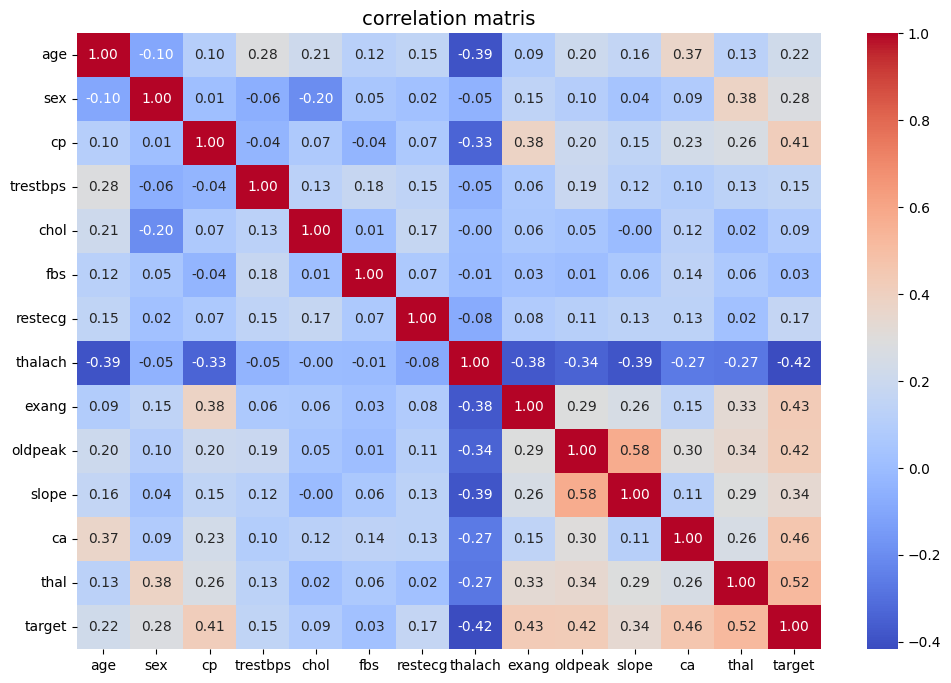

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation matris',fontsize=14)
plt.show()

In [8]:
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)


In [9]:
print("X_train.shape:",X_train.shape)
print("X_test.shape",X_test.shape)
print("y_train.shape" ,y_train.shape)
print("y_test.shape",y_test.shape)

X_train.shape: (242, 13)
X_test.shape (61, 13)
y_train.shape (242,)
y_test.shape (61,)


In [10]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=100),
    "SVM":SVC(kernel='rbf', probability=True),
    "Logistic Regression":LogisticRegression(max_iter=1000)
}

In [12]:
print("models",models)
results={}
for name, model in models.items():
   model.fit(X_train,y_train)
   y_pred=model.predict(X_test)
   accuracy=accuracy_score(y_test,y_pred)
   cm=confusion_matrix(y_test,y_pred)
   report=classification_report(y_test,y_pred)

models {'Random Forest': RandomForestClassifier(), 'SVM': SVC(probability=True), 'Logistic Regression': LogisticRegression(max_iter=1000)}


In [13]:
for name, model in models.items():
    try:
       model.fit(X_train,y_train)
       y_pred=model.predict(X_test)
       accuracy=accuracy_score(y_test,y_pred)
       cm=confusion_matrix(y_test,y_pred)
       report=classification_report(y_test,y_pred)

       print(f"\nresults for {name}:")
       print(f"accuracy:{accuracy:.2%}")
       print("confusion matrix:\n",cm)
       print(f"classification_report:\n",report)
    except Exception as e:
      print(f"Error for {name}:{e}")


results for Random Forest:
accuracy:91.80%
confusion matrix:
 [[29  4]
 [ 1 27]]
classification_report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.87      0.96      0.92        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


results for SVM:
accuracy:85.25%
confusion matrix:
 [[27  6]
 [ 3 25]]
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61


results for Logistic Regression:
accuracy:86.89%
confusion matrix:
 [[27  6]
 [ 2 26]]
classification_report:
               precision    recal

In [14]:
man=np.array([[21,1,1,94,126,0,0,71,0,0,1,0,3]])
out1=model.predict(man)
print(out1)

[1]


In [23]:
import joblib
model1=RandomForestClassifier(n_estimators=100,random_state=42)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

model_package={
    'model':model1,
    'scaler':scaler,
    'feature_names':list(X.columns),
    'model_accuracy':accuracy,
    'training_date':pd.Timestamp.now(),
    'version':'1.0'
}
joblib.dump(model1,'Heart_Disease_Detection.pkl')
print("DONE!")

DONE!
